# SV Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os, sys
sys.path.insert(0, '/Users/jocelynornelasmunoz/Desktop/structural_variants/lib')
sys.path.insert(0, '/Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/structural_variants/lib')
DATA_PATH='/Users/jocelynornelasmunoz/Desktop/structural_variants/data/simulated/4p_4c_coverage'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import confusion_matrix as confmat

In [4]:
laptop_path = '/Users/jocelynornelas/iCloud Drive (Archive)/Desktop/UC Merced/Research/structural_variants/data/simulated/'
desktop_path = '/Users/jocelynornelasmunoz/Desktop/structural_variants/data/simulated/'

In [5]:
data = json.loads(open(laptop_path + '4p_4c_coverage/reconstruction_2size_').read())

In [6]:
data.keys()

dict_keys(['f_true', 'fhat_SPIRAL', 'cputime_SPIRAL', 'iterations_SPIRAL', 'reconerror_SPIRAL', 'fhat_NEBULA', 'cputime_NEBULA', 'iterations_NEBULA', 'reconerror_NEBULA', 'f_p', 'f_c', 'f_h', 'f_n', 's_p', 's_c', 'tau', 'gamma', 'maxiter', 'n', 'k', 'lambda_c', 'lambda_p', 'pctNovel', 'erreps'])

In [7]:
fhat_SPIRAL = np.array(data['fhat_SPIRAL'])
fhat_NEBULA = np.array(data['fhat_NEBULA'])

In [8]:
f_true = np.array(data['f_true'])

In [14]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(f_true, fhat_SPIRAL, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

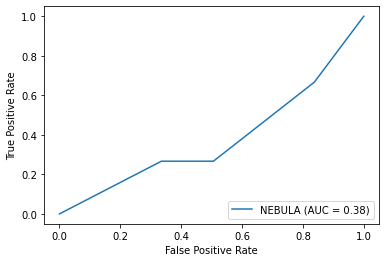

In [15]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='NEBULA')
display.plot()
plt.show()

In [ ]:
from confusion_matrix import heatmap, annotate_heatmap
import sklearn

con_mat = sklearn.metrics.confusion_matrix(f_true,f_hat,normalize='true')
axlabels=['SV', 'Not SV']

fig, ax = plt.subplots()
im, cbar = heatmap(con_mat, axlabels, axlabels, ax=ax,cmap = 'Blues', cbarlabel="Probability")
plt.ylabel("Truth")
plt.xlabel("Prediction")
texts = annotate_heatmap(im, valfmt="{x:.3f}")